**Import dependencies**

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import datetime as dt

**Study data files**

In [2]:
# Toronto files
toronto_Q1_path = os.path.join("Resources/Toronto", "2019-Q1.csv")
toronto_Q2_path = os.path.join("Resources/Toronto", "2019-Q2.csv")
toronto_Q3_path = os.path.join("Resources/Toronto", "2019-Q3.csv")
toronto_Q4_path = os.path.join("Resources/Toronto", "2019-Q4.csv")

# Vancouver files


**Read the data and study the results**

In [3]:
# Toronto
q1 = pd.read_csv(toronto_Q1_path, encoding="utf=8")
q2 = pd.read_csv(toronto_Q2_path, encoding="utf=8")
q3 = pd.read_csv(toronto_Q3_path, encoding="utf=8")
q4 = pd.read_csv(toronto_Q4_path, encoding="utf=8")

# Vancouver


## Toronto

**Rename columns and display the data for preview**

In [4]:
q1 = q1.rename(columns={"Trip  Duration": "Trip Duration"})
q2 = q2.rename(columns={"Trip  Duration": "Trip Duration"})
q3 = q3.rename(columns={"Trip  Duration": "Trip Duration"})
q4 = q4.rename(columns={"Trip  Duration": "Trip Duration"})

**Total number of trips**

In [5]:
q1_total = q1.count()["Trip Id"]
q2_total = q2.count()["Trip Id"]
q3_total = q3.count()["Trip Id"]
q4_total = q4.count()["Trip Id"]
yr_total = q1_total + q2_total + q3_total + q4_total

to_total_trips_df = pd.DataFrame({"Qtr1" : q1_total,"Qtr2" : q2_total, "Qtr3" : q3_total,
                                 "Qtr4" : q4_total, "Year Total" : yr_total}, index=[0])
to_total_trips_df

,Qtr1,Qtr2,Qtr3,Qtr4,Year Total
0,189063,651685,1130353,468416,2439517


**Total number of trips per station**

In [6]:
# Q1
station1 = q1["Start Station Id"].astype(str) + " " + q1["Start Station Name"]
q1["Start Station"] = station1
q1.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Start Station
0,4581278,199751,1547,7021,01/01/2019 00:08,Bay St / Albert St,7233,01/01/2019 00:33,King / Cowan Ave - SMART,1296,Annual Member,7021 Bay St / Albert St
1,4581279,294730,1112,7160,01/01/2019 00:10,King St W / Tecumseth St,7051,01/01/2019 00:29,Wellesley St E / Yonge St (Green P),2947,Annual Member,7160 King St W / Tecumseth St
2,4581280,197252,589,7055,01/01/2019 00:15,Jarvis St / Carlton St,7013,01/01/2019 00:25,Scott St / The Esplanade,2293,Annual Member,7055 Jarvis St / Carlton St
3,4581281,171700,259,7012,01/01/2019 00:16,Elizabeth St / Edward St (Bus Terminal),7235,01/01/2019 00:20,Bay St / College St (West Side) - SMART,283,Annual Member,7012 Elizabeth St / Edward St (Bus Terminal)
4,4581282,306314,281,7041,01/01/2019 00:19,Edward St / Yonge St,7257,01/01/2019 00:24,Dundas St W / St. Patrick St,1799,Annual Member,7041 Edward St / Yonge St


In [7]:
q1_stations = q1.groupby(["Start Station"])
q1_trips = q1_stations["Start Station Id"].count()
q1_stations_df = pd.DataFrame({"Q1 Trips" : q1_trips }).reset_index()
q1_stations_df

,Start Station,Q1 Trips
0,7000 Fort York Blvd / Capreol Ct,1148
1,7001 Lower Jarvis St / The Esplanade,544
2,7002 St. George St / Bloor St W,1363
3,7003 Madison Ave / Bloor St W,677
4,7004 University Ave / Elm St,787
...,...,...
354,7386 D'Arcy St. /McCaul St. SMART,461
355,7387 Mortimer Ave / Carlaw Ave SMART,84
356,7388 Broadview Ave / Danforth Ave,237
357,7389 College Park- Gerrard Entrance,517


In [8]:
q1_stations_df

,Start Station,Q1 Trips
0,7000 Fort York Blvd / Capreol Ct,1148
1,7001 Lower Jarvis St / The Esplanade,544
2,7002 St. George St / Bloor St W,1363
3,7003 Madison Ave / Bloor St W,677
4,7004 University Ave / Elm St,787
...,...,...
354,7386 D'Arcy St. /McCaul St. SMART,461
355,7387 Mortimer Ave / Carlaw Ave SMART,84
356,7388 Broadview Ave / Danforth Ave,237
357,7389 College Park- Gerrard Entrance,517


In [9]:
# Q2
station2 = q2["Start Station Id"].astype(str) + " " + q2["Start Station Name"]
q2["Start Station"] = station2
q2.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Start Station
0,4802542,192775,183,7147,04/01/2019 00:04,King St W / Fraser Ave,7233.0,04/01/2019 00:07,King / Cowan Ave - SMART,1477,Annual Member,7147 King St W / Fraser Ave
1,4802543,279623,656,7013,04/01/2019 00:07,Scott St / The Esplanade,7236.0,04/01/2019 00:18,Thompson St / Broadview Ave - SMART,3712,Annual Member,7013 Scott St / The Esplanade
2,4802544,315385,302,7195,04/01/2019 00:08,Ulster St / Bathurst St,7206.0,04/01/2019 00:13,Claremont St / Dundas St W,1356,Casual Member,7195 Ulster St / Bathurst St
3,4802545,192775,24,7233,04/01/2019 00:08,King / Cowan Ave - SMART,7233.0,04/01/2019 00:08,King / Cowan Ave - SMART,1477,Annual Member,7233 King / Cowan Ave - SMART
4,4802546,192775,16,7233,04/01/2019 00:09,King / Cowan Ave - SMART,7233.0,04/01/2019 00:09,King / Cowan Ave - SMART,1477,Annual Member,7233 King / Cowan Ave - SMART


In [10]:
q2_stations = q2.groupby(["Start Station"])
q2_trips = q2_stations["Start Station Id"].count()
q2_stations_df = pd.DataFrame({"Q2 Trips" : q2_trips }).reset_index()


In [11]:
q2_stations_df

,Start Station,Q2 Trips
0,7000 Fort York Blvd / Capreol Ct,5027
1,7001 Lower Jarvis St / The Esplanade,2538
2,7002 St. George St / Bloor St W,3455
3,7003 Madison Ave / Bloor St W,1850
4,7004 University Ave / Elm St,1534
...,...,...
363,7398 York St / Harbour St,23
364,7403 Lascelles Blvd / Eglinton Ave W - SMART,1
365,7406 Victoria St / Queen St E,5
366,7417 King St W / Jordan St,1


In [12]:
# Q3
station3 = q3["Start Station Id"].astype(str) + " " + q3["Start Station Name"]
q3["Start Station"] = station3
q3.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Start Station
0,5533843,376806,1834,7352,07/01/2019 00:00,Cosburn Ave / Donlands Ave,7352.0,07/01/2019 00:30,Cosburn Ave / Donlands Ave,989,Casual Member,7352 Cosburn Ave / Donlands Ave
1,5533844,347750,338,7016,07/01/2019 00:00,Bay St / Queens Quay W (Ferry Terminal),7068.0,07/01/2019 00:06,Dockside Dr / Queens Quay E (Sugar Beach),4006,Annual Member,7016 Bay St / Queens Quay W (Ferry Terminal)
2,5533845,359684,1433,7193,07/01/2019 00:00,Queen St W / Gladstone Ave,7285.0,07/01/2019 00:24,Spadina Ave / Harbord St - SMART,1512,Casual Member,7193 Queen St W / Gladstone Ave
3,5533846,375181,1042,7369,07/01/2019 00:00,Dupont St / Emerson Ave SMART,7239.0,07/01/2019 00:18,Bloor St W / Manning Ave - SMART,3219,Casual Member,7369 Dupont St / Emerson Ave SMART
4,5533847,373163,4203,7168,07/01/2019 00:01,Queens Quay / Yonge St,7226.0,07/01/2019 01:11,Lake Shore Blvd W / The Boulevard Club,4425,Casual Member,7168 Queens Quay / Yonge St


In [13]:
q3_stations = q3.groupby(["Start Station"])
q3_trips = q3_stations["Start Station Id"].count()
q3_stations_df = pd.DataFrame({"Q3 Trips" : q3_trips }).reset_index()


In [14]:
q3_stations_df

,Start Station,Q3 Trips
0,7000 Fort York Blvd / Capreol Ct,6692
1,7001 Lower Jarvis St / The Esplanade,3708
2,7002 St. George St / Bloor St W,4917
3,7003 Madison Ave / Bloor St W,2115
4,7004 University Ave / Elm St,2136
...,...,...
463,7506 Berkeley St / Adelaide St E - SMART,433
464,7508 Berkeley St / Dundas St E - SMART,1008
465,7509 Ontario St / King St E,1093
466,7510 Princes Gate / Nunavut Dr,473


In [15]:
# Q4
station4 = q4["Start Station Id"].astype(str) + " " + q4["Start Station Name"]
q4["Start Station"] = station4
q4.head()

,Trip Id,Subscription Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Start Station
0,6794858,370589,692,7418,10/01/2019 00:00,College Park - Yonge St Entrance,7463.0,10/01/2019 00:11,Adelaide St W / Brant St,4719,Annual Member,7418 College Park - Yonge St Entrance
1,6794859,501698,1899,7049,10/01/2019 00:00,Queen St W / Portland St,7292.0,10/01/2019 00:32,Granby St / Church St - SMART,4032,Casual Member,7049 Queen St W / Portland St
2,6794860,501701,509,7426,10/01/2019 00:00,Fleet St / Garrison Rd (Fort York),7160.0,10/01/2019 00:09,King St W / Tecumseth St,1396,Casual Member,7426 Fleet St / Garrison Rd (Fort York)
3,6794861,501722,1219,7382,10/01/2019 00:02,Simcoe St / Adelaide St W,7120.0,10/01/2019 00:22,Gerrard St E / River St,2067,Casual Member,7382 Simcoe St / Adelaide St W
4,6794862,325457,650,7217,10/01/2019 00:02,Soho St / Queen St W,7509.0,10/01/2019 00:13,Ontario St / King St E,3910,Annual Member,7217 Soho St / Queen St W


In [16]:
# Q4
q4_stations = q4.groupby(["Start Station"])
q4_trips = q4_stations["Start Station Id"].count()
q4_stations_df = pd.DataFrame({"Q4 Trips" : q4_trips }).reset_index()


In [17]:
q4_stations_df

,Start Station,Q4 Trips
0,7000 Fort York Blvd / Capreol Ct,2775
1,7001 Lower Jarvis St / The Esplanade,1202
2,7002 St. George St / Bloor St W,2899
3,7003 Madison Ave / Bloor St W,1079
4,7004 University Ave / Elm St,1134
...,...,...
459,7505 Ontario St / Adelaide St E -SMART,556
460,7506 Berkeley St / Adelaide St E - SMART,59
461,7508 Berkeley St / Dundas St E - SMART,717
462,7509 Ontario St / King St E,742


**Summary of trips by quarter**

In [18]:
s1 = pd.merge(q1_stations_df, q2_stations_df, on=["Start Station"], how="outer")
s1

,Start Station,Q1 Trips,Q2 Trips
0,7000 Fort York Blvd / Capreol Ct,1148.0,5027
1,7001 Lower Jarvis St / The Esplanade,544.0,2538
2,7002 St. George St / Bloor St W,1363.0,3455
3,7003 Madison Ave / Bloor St W,677.0,1850
4,7004 University Ave / Elm St,787.0,1534
...,...,...,...
363,7398 York St / Harbour St,NaN,23
364,7403 Lascelles Blvd / Eglinton Ave W - SMART,NaN,1
365,7406 Victoria St / Queen St E,NaN,5
366,7417 King St W / Jordan St,NaN,1


In [19]:
s2 = pd.merge(q3_stations_df, q4_stations_df, on=["Start Station"], how="outer")
s2

,Start Station,Q3 Trips,Q4 Trips
0,7000 Fort York Blvd / Capreol Ct,6692,2775.0
1,7001 Lower Jarvis St / The Esplanade,3708,1202.0
2,7002 St. George St / Bloor St W,4917,2899.0
3,7003 Madison Ave / Bloor St W,2115,1079.0
4,7004 University Ave / Elm St,2136,1134.0
...,...,...,...
463,7506 Berkeley St / Adelaide St E - SMART,433,59.0
464,7508 Berkeley St / Dundas St E - SMART,1008,717.0
465,7509 Ontario St / King St E,1093,742.0
466,7510 Princes Gate / Nunavut Dr,473,160.0


In [20]:
qtr_stations_df = pd.merge(s1, s2, on=["Start Station"], how="outer")
qtr_stations_df

,Start Station,Q1 Trips,Q2 Trips,Q3 Trips,Q4 Trips
0,7000 Fort York Blvd / Capreol Ct,1148.0,5027.0,6692.0,2775.0
1,7001 Lower Jarvis St / The Esplanade,544.0,2538.0,3708.0,1202.0
2,7002 St. George St / Bloor St W,1363.0,3455.0,4917.0,2899.0
3,7003 Madison Ave / Bloor St W,677.0,1850.0,2115.0,1079.0
4,7004 University Ave / Elm St,787.0,1534.0,2136.0,1134.0
...,...,...,...,...,...
464,7506 Berkeley St / Adelaide St E - SMART,NaN,NaN,433.0,59.0
465,7508 Berkeley St / Dundas St E - SMART,NaN,NaN,1008.0,717.0
466,7509 Ontario St / King St E,NaN,NaN,1093.0,742.0
467,7510 Princes Gate / Nunavut Dr,NaN,NaN,473.0,160.0


**Set Nan values to 0**

In [21]:
qtr_stations_df = qtr_stations_df.fillna(0)

In [22]:
qtr_stations_df

,Start Station,Q1 Trips,Q2 Trips,Q3 Trips,Q4 Trips
0,7000 Fort York Blvd / Capreol Ct,1148.0,5027.0,6692.0,2775.0
1,7001 Lower Jarvis St / The Esplanade,544.0,2538.0,3708.0,1202.0
2,7002 St. George St / Bloor St W,1363.0,3455.0,4917.0,2899.0
3,7003 Madison Ave / Bloor St W,677.0,1850.0,2115.0,1079.0
4,7004 University Ave / Elm St,787.0,1534.0,2136.0,1134.0
...,...,...,...,...,...
464,7506 Berkeley St / Adelaide St E - SMART,0.0,0.0,433.0,59.0
465,7508 Berkeley St / Dundas St E - SMART,0.0,0.0,1008.0,717.0
466,7509 Ontario St / King St E,0.0,0.0,1093.0,742.0
467,7510 Princes Gate / Nunavut Dr,0.0,0.0,473.0,160.0


**Top 10% of the busiest stations**

In [23]:
ten_pct = round(qtr_stations_df.count() * 0.1).astype(int)

In [24]:
q1_top_stations = q1_stations_df.sort_values(by=["Q1 Trips"], ascending=False).head(ten_pct["Start Station"])
q2_top_stations = q2_stations_df.sort_values(by=["Q2 Trips"], ascending=False).head(ten_pct["Start Station"])
q3_top_stations = q3_stations_df.sort_values(by=["Q3 Trips"], ascending=False).head(ten_pct["Start Station"])
q4_top_stations = q4_stations_df.sort_values(by=["Q4 Trips"], ascending=False).head(ten_pct["Start Station"])



**Bottom 10% of the busiest stations**

In [25]:
q1_bottom_stations = q1_stations_df.sort_values(by=["Q1 Trips"], ascending=False).tail(ten_pct["Start Station"])
q2_bottom_stations = q2_stations_df.sort_values(by=["Q2 Trips"], ascending=False).tail(ten_pct["Start Station"])
q3_bottom_stations = q3_stations_df.sort_values(by=["Q3 Trips"], ascending=False).tail(ten_pct["Start Station"])
q4_bottom_stations = q4_stations_df.sort_values(by=["Q4 Trips"], ascending=False).tail(ten_pct["Start Station"])

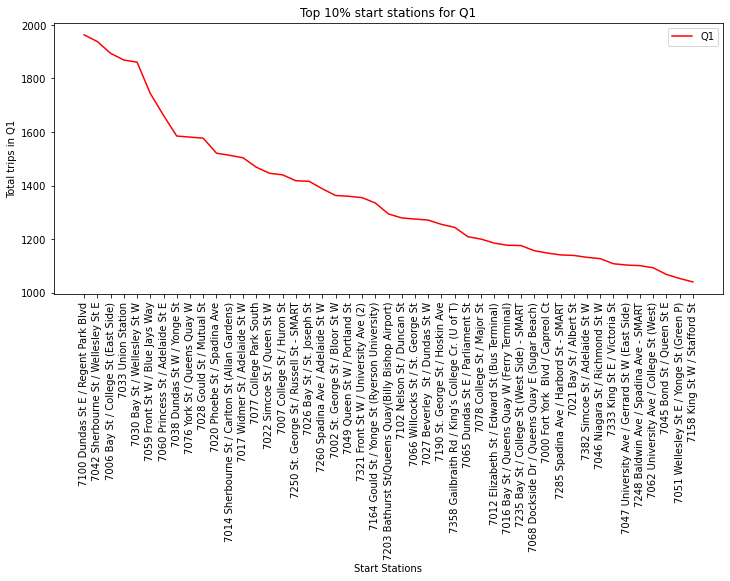

In [33]:
x_axis = q1_top_stations["Start Station"]

tick_locations=[]
for x in x_axis:
    tick_locations.append(x)
    
labels = []
for x in x_axis:
    labels.append(x)

fig1,ax = plt.subplots(figsize=(12,5))

y_axis1 = q1_top_stations["Q1 Trips"]

plt.plot(x_axis, y_axis1, color="red", label="Q1")

plt.xticks(tick_locations,labels,rotation ='vertical')
plt.title("Top 10% start stations for Q1")
plt.xlabel("Start Stations")
plt.ylabel("Total trips in Q1")
plt.legend(loc="best")
plt.show()


**Busiest/popular station**

In [34]:
# Q1
q1_popular_df = q1_stations_df.loc[q1_stations_df["Q1 Trips"] == q1_stations_df.iloc[:,1].max()]
q1_popular_df

,Start Station,Q1 Trips
97,7100 Dundas St E / Regent Park Blvd,1963


In [35]:
# Q2
q2_popular_df = q2_stations_df.loc[q2_stations_df["Q2 Trips"] == q2_stations_df.iloc[:,1].max()]
q2_popular_df

,Start Station,Q2 Trips
76,7076 York St / Queens Quay W,9403


In [36]:
# Q3
q3_popular_df = q3_stations_df.loc[q3_stations_df["Q3 Trips"] == q3_stations_df.iloc[:,1].max()]
q3_popular_df

,Start Station,Q3 Trips
76,7076 York St / Queens Quay W,14703


In [37]:
# Q4
q4_popular_df = q4_stations_df.loc[q4_stations_df["Q4 Trips"] == q4_stations_df.iloc[:,1].max()]
q4_popular_df

,Start Station,Q4 Trips
42,7042 Sherbourne St / Wellesley St E,4136


**Summary statistics table on trip duration (quarterly)**

In [38]:
q1_agg = q1["Trip Duration"].describe()
q2_agg = q2["Trip Duration"].describe()
q3_agg = q3["Trip Duration"].describe()
q4_agg = q4["Trip Duration"].describe()

In [39]:
q1_agg_df = pd.DataFrame({"Count" : q1_agg['count'], "Mean": q1_agg['mean'], "Std Dev" : q1_agg['std'],
                          "Min" : q1_agg['min'], "Max" : q1_agg['max']}, index=["Q1"])
q2_agg_df = pd.DataFrame({"Count" : q2_agg['count'], "Mean": q2_agg['mean'],  "Std Dev" : q2_agg['std'],
                          "Min" : q2_agg['min'], "Max" : q2_agg['max']}, index=["Q2"])
q3_agg_df = pd.DataFrame({"Count" : q3_agg['count'], "Mean": q3_agg['mean'],  "Std Dev" : q3_agg['std'],
                          "Min" : q3_agg['min'], "Max" : q3_agg['max']}, index=["Q3"])
q4_agg_df = pd.DataFrame({"Count" : q4_agg['count'], "Mean": q4_agg['mean'],  "Std Dev" : q4_agg['std'],
                          "Min" : q4_agg['min'], "Max" : q4_agg['max']}, index=["Q4"])

In [40]:
q1q2_agg_df = q1_agg_df.append(q2_agg_df)
q3q4_agg_df = q3_agg_df.append(q4_agg_df)
agg_df = q1q2_agg_df.append(q3q4_agg_df)

In [41]:
agg_df

,Count,Mean,Std Dev,Min,Max
Q1,189063.0,806.803838,9860.073386,2.0,2616693.0
Q2,651685.0,1062.455961,12619.323324,0.0,5171059.0
Q3,1130353.0,1112.570266,16041.131432,0.0,12403785.0
Q4,468416.0,956.959483,30226.247893,0.0,12016662.0


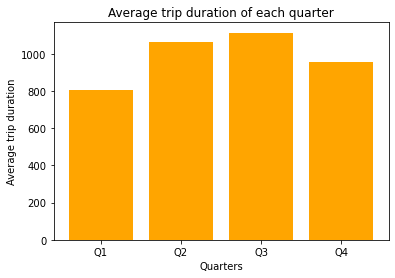

In [45]:
#Plotting the Average trip duration of each quarter

y_axis = agg_df["Mean"]
x_axis = agg_df.index

plt.bar(x_axis,y_axis, color="orange", align="center")
plt.title("Average trip duration of each quarter")
plt.xlabel("Quarters")
plt.ylabel("Average trip duration")
plt.show()

**Popular time of day**

* create 8 3hr time frame bins for number of trips in 24hrs

In [ ]:
bins = [0,2,5,8,11,14,17,20,23]

# create labels for the bins
midnight = "00:00 - 02:59"
three_am = "03:00 - 05:59"
six_am = "06:00 - 08:59"
nine_am = "09:00 - 11:59"
noon = "12:00 - 14:59"
three_pm = "15:00 - 17:59"
six_pm = "18:00 - 20:59"
nine_pm = "21:00 - 23:59"

time_bins =[midnight, three_am, six_am, nine_am, noon, three_pm, six_pm, nine_pm]


**Q1**

In [ ]:
# convert column data into datetime, then assign to a variable
q1_start_time_df = q1[["Start Time"]]
q1_start_time = pd.to_datetime(q1["Start Time"])

# get the hour portion and create a data frame
q1_time_started = q1_start_time.dt.hour
q1_time_started_df = pd.DataFrame(q1_time_started)

# merge hour data to start_time_df
q1_rides_df = q1_start_time_df.merge(q1_time_started_df, left_index=True, right_index=True)

q1_rides_df = q1_rides_df.rename(columns={"Start Time_x" : "Start Time",
                                             "Start Time_y" : "Hour"})

#display ride_times_df
q1_rides_df


In [ ]:
#slice the data and place it into bins
q1_rides_df["Time Group"] = pd.cut(q1_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)

q1_rides = q1_rides_df["Time Group"].value_counts()
q1_rides = q1_rides.sort_index()

#get the percentage of riders per time group
q1_pcts = (q1_rides / q1_total * 100).map("{:.2f}%".format)

# create summary data frame to hold results
q1_hour_bin_df = pd.DataFrame({"Total Rides" : q1_rides, "Pct (%) of Rides" : q1_pcts})

# display rides summary table
q1_hour_bin_df

**Q2**

In [ ]:
# convert column data into datetime, then assign to a variable
q2_start_time_df = q2[["Start Time"]]
q2_start_time = pd.to_datetime(q2["Start Time"])

# get the hour portion and create a data frame
q2_time_started = q2_start_time.dt.hour
q2_time_started_df = pd.DataFrame(q2_time_started)

# merge hour data to start_time_df
q2_rides_df = q2_start_time_df.merge(q2_time_started_df, left_index=True, right_index=True)

q2_rides_df = q2_rides_df.rename(columns={"Start Time_x" : "Start Time",
                                             "Start Time_y" : "Hour"})

#display ride_times_df
q2_rides_df

In [ ]:
#slice the data and place it into bins
q2_rides_df["Time Group"] = pd.cut(q2_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)

q2_rides = q2_rides_df["Time Group"].value_counts()
q2_rides = q2_rides.sort_index()

#get the percentage of riders per time group
q2_pcts = (q2_rides / q2_total * 100).map("{:.2f}%".format)

# create summary data frame to hold results
q2_hour_bin_df = pd.DataFrame({"Total Rides" : q2_rides, "Pct (%) of Rides" : q2_pcts})

# display rides summary table
q2_hour_bin_df

**Q3**

In [ ]:
# convert column data into datetime, then assign to a variable
q3_start_time_df = q3[["Start Time"]]
q3_start_time = pd.to_datetime(q3["Start Time"])

# get the hour portion and create a data frame
q3_time_started = q3_start_time.dt.hour
q3_time_started_df = pd.DataFrame(q3_time_started)

# merge hour data to start_time_df
q3_rides_df = q3_start_time_df.merge(q3_time_started_df, left_index=True, right_index=True)

q3_rides_df = q3_rides_df.rename(columns={"Start Time_x" : "Start Time",
                                             "Start Time_y" : "Hour"})

#display ride_times_df
q3_rides_df

In [ ]:
#slice the data and place it into bins
q3_rides_df["Time Group"] = pd.cut(q3_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)

q3_rides = q3_rides_df["Time Group"].value_counts()
q3_rides = q3_rides.sort_index()

#get the percentage of riders per time group
q3_pcts = (q3_rides / q3_total * 100).map("{:.2f}%".format)

# create summary data frame to hold results
q3_hour_bin_df = pd.DataFrame({"Total Rides" : q3_rides, "Pct (%) of Rides" : q3_pcts})

# display rides summary table
q3_hour_bin_df

**Q4**

In [ ]:
# convert column data into datetime, then assign to a variable
q4_start_time_df = q4[["Start Time"]]
q4_start_time = pd.to_datetime(q4["Start Time"])

# get the hour portion and create a data frame
q4_time_started = q4_start_time.dt.hour
q4_time_started_df = pd.DataFrame(q4_time_started)

# merge hour data to start_time_df
q4_rides_df = q4_start_time_df.merge(q4_time_started_df, left_index=True, right_index=True)

q4_rides_df = q4_rides_df.rename(columns={"Start Time_x" : "Start Time",
                                             "Start Time_y" : "Hour"})

#display ride_times_df
q4_rides_df

In [ ]:
#slice the data and place it into bins
q4_rides_df["Time Group"] = pd.cut(q4_rides_df["Hour"], bins, labels=time_bins, include_lowest=True)

q4_rides = q4_rides_df["Time Group"].value_counts()
q4_rides = q4_rides.sort_index()

#get the percentage of riders per time group
q4_pcts = (q4_rides / q4_total * 100).map("{:.2f}%".format)

# create summary data frame to hold results
q4_hour_bin_df = pd.DataFrame({"Total Rides" : q4_rides, "Pct (%) of Rides" : q4_pcts})

# display rides summary table
q4_hour_bin_df

**Total number of unique users by quarter**

In [ ]:
to_q1_user_type = q1[["Subscription Id", "User Type"]].drop_duplicates()
to_q1_user_count = to_q1_user_type["Subscription Id"].count()
q1_user_type_df = pd.DataFrame({"Qtr1 Total" : to_q1_user_type["User Type"].value_counts()}).reset_index()
q1_user_type_df["Q1 Pct (%)"] = (q1_user_type_df["Qtr1 Total"] / to_q1_user_count) * 100
q1_user_type_df["Q1 Pct (%)"] = q1_user_type_df["Q1 Pct (%)"].map("{:.2f}%".format)
q1_user_type_df

In [ ]:
to_q2_user_type = q2[["Subscription Id", "User Type"]].drop_duplicates()
to_q2_user_count = to_q2_user_type["Subscription Id"].count()
q2_user_type_df = pd.DataFrame({"Qtr2 Total" : to_q2_user_type["User Type"].value_counts()}).reset_index()
q2_user_type_df["Q2 Pct (%)"] = (q2_user_type_df["Qtr2 Total"] / to_q2_user_count) * 100
q2_user_type_df["Q2 Pct (%)"] = q2_user_type_df["Q2 Pct (%)"].map("{:.2f}%".format)

q2_user_type_df

In [ ]:
to_q3_user_type = q3[["Subscription Id", "User Type"]].drop_duplicates()
to_q3_user_count = to_q3_user_type["Subscription Id"].count()
q3_user_type_df = pd.DataFrame({"Qtr3 Total" : to_q3_user_type["User Type"].value_counts()}).reset_index()
q3_user_type_df["Q3 Pct (%)"] = (q3_user_type_df["Qtr3 Total"] / to_q3_user_count) * 100
q3_user_type_df["Q3 Pct (%)"] = q3_user_type_df["Q3 Pct (%)"].map("{:.2f}%".format)

q3_user_type_df

In [ ]:
to_q4_user_type = q4[["Subscription Id", "User Type"]].drop_duplicates()
to_q4_user_count = to_q4_user_type["Subscription Id"].count()
q4_user_type_df = pd.DataFrame({"Qtr4 Total" : to_q4_user_type["User Type"].value_counts()}).reset_index()
q4_user_type_df["Q4 Pct (%)"] = (q4_user_type_df["Qtr4 Total"] / to_q4_user_count) * 100
q4_user_type_df["Q4 Pct (%)"] = q4_user_type_df["Q4 Pct (%)"].map("{:.2f}%".format)

q4_user_type_df

**Summary of users by quarter**

In [ ]:
x = pd.merge(q1_user_type_df,q2_user_type_df, how="inner", on="index")
y = pd.merge(q3_user_type_df,q4_user_type_df, how="inner", on="index")
to_users_type_df = pd.merge(x,y, how="inner", on="index")
to_users_type_df = to_users_type_df.rename(columns={"Qtr1 Total": "Qtr1", "Qtr2 Total" : "Qtr2",
                                                    "Qtr3 Total" : "Qtr3", "Qtr4 Total" : "Qtr4", 
                                                     "index" : "User Type"})
to_users_type_df

**Total number of unique users for the year**

In [ ]:
q1q2 = pd.merge(to_q1_user_type, to_q2_user_type, how='outer', on=["Subscription Id", "User Type"])
q3q4 = pd.merge(to_q3_user_type, to_q4_user_type, how='outer', on=["Subscription Id", "User Type"])
toronto_users = pd.merge(q1q2, q3q4,how='outer', on=["Subscription Id", "User Type"])
toronto_users

In [ ]:
to_total_users = toronto_users["Subscription Id"].count()
to_total_users_df = pd.DataFrame({"Total Riders": [to_total_users]})
to_total_users_df

**Total number (year) and percentage of Toronto Users per Membership Type**

In [ ]:
to_users_df = pd.DataFrame({"Total Users" : toronto_users["User Type"].value_counts()})
to_users_df["Pct (%) of Users"] = (to_users_df[:].astype('int64') / to_total_users) * 100

#format data
to_users_df["Total Users"] = to_users_df["Total Users"].map("{:,}".format)
to_users_df["Pct (%) of Users"] = to_users_df["Pct (%) of Users"].map("{:.2f}%".format)

#display data frame
to_users_df

**Number of trips by User type**

In [ ]:
# Q1
q1_trips_user_type = q1.groupby("User Type", as_index=False)["Subscription Id"].count()
q1_trips_user_type

In [ ]:
# Q2
q2_trips_user_type = q2.groupby("User Type", as_index=False)["Subscription Id"].count()
q2_trips_user_type

In [ ]:
# Q3
q3_trips_user_type = q3.groupby("User Type", as_index=False)["Subscription Id"].count()
q3_trips_user_type

In [ ]:
# Q4
q4_trips_user_type = q4.groupby("User Type", as_index=False)["Subscription Id"].count()
q4_trips_user_type

In [ ]:
q1q2 = pd.merge(q1_trips_user_type,q2_trips_user_type, on="User Type")
q1q2 = q1q2.rename(columns={"Subscription Id_x" : "Q1", "Subscription Id_y" : "Q2"})
q1q2

In [ ]:
q3q4 = pd.merge(q3_trips_user_type,q4_trips_user_type, on="User Type")
q3q4 = q3q4.rename(columns={"Subscription Id_x" : "Q3", "Subscription Id_y" : "Q4"})
q3q4

In [ ]:
trips_by_type_df = pd.merge(q1q2, q3q4, on="User Type")

In [ ]:
trips_by_type_df["Year Total"] = q1q2.Q1 + q1q2.Q2 + q3q4.Q3 + q3q4.Q4

**Total number of trips by user type (quarterly and yearly)**

In [ ]:
trips_by_type_df

**Total number of trips made for 2019**

In [ ]:
to_total_trips_df  #calculated at the start of this notebook